In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [19]:
# data load
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalization (convert 255 into 0-1 pixel)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshaping
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# new model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    
    # Dropout 
    layers.Dropout(0.2), 
    
    layers.Dense(64, activation='relu'),
    
    # Dropout
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping 

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


history = model.fit(x_train, y_train, 
                    epochs=20,
                    validation_split=0.2,
                    callbacks=[early_stop])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8504 - loss: 0.4732 - val_accuracy: 0.9824 - val_loss: 0.0639
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9747 - loss: 0.0824 - val_accuracy: 0.9861 - val_loss: 0.0472
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9824 - loss: 0.0546 - val_accuracy: 0.9874 - val_loss: 0.0429
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9861 - loss: 0.0448 - val_accuracy: 0.9883 - val_loss: 0.0424
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9887 - loss: 0.0368 - val_accuracy: 0.9866 - val_loss: 0.0481
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9887 - loss: 0.0346 - val_accuracy: 0.9885 - val_loss: 0.0416
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9915 - loss: 0.0272 - val_accuracy: 0.9904 - val_loss: 0.0362
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9921 -

<Figure size 1400x500 with 0 Axes>

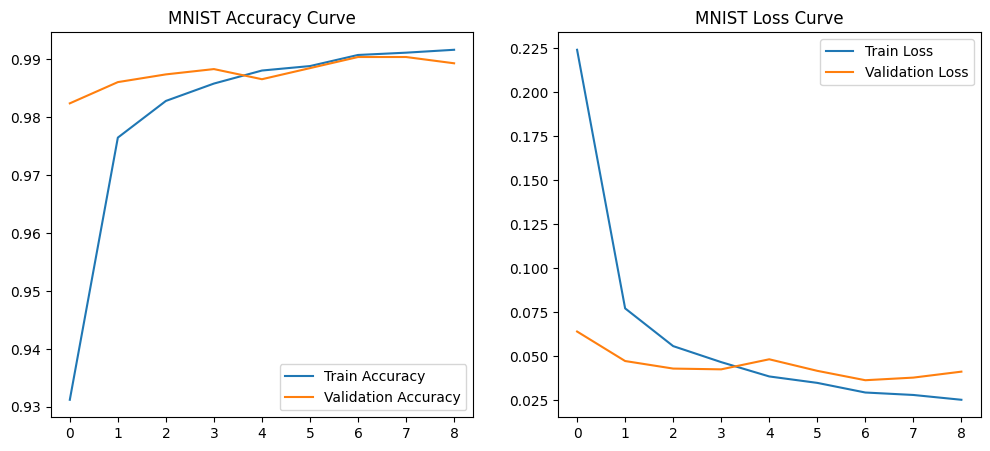

In [21]:

# graph frame 
plt.figure(figsize=(14, 5))

plt.figure(figsize=(12, 5))

# Accuracy Graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST Accuracy Curve')
plt.legend()

# Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MNIST Loss Curve')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9894 - loss: 0.0292

Test Accuracy: 99.13%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<Axes: >

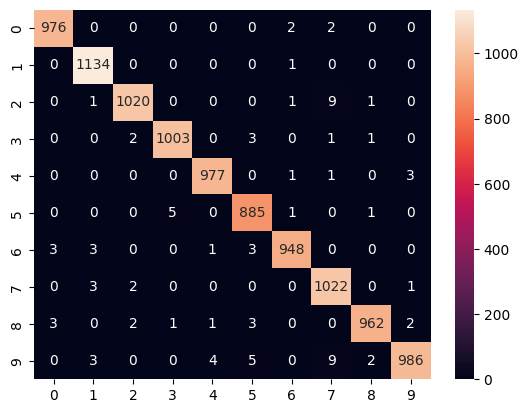

In [22]:
#Evalution
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest Accuracy: {test_acc * 100:.2f}%')

# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

# heatmap
sns.heatmap(cm, annot=True, fmt='d')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


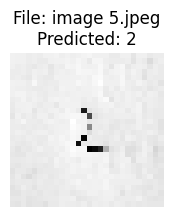

The model predicted for image 5.jpeg is: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


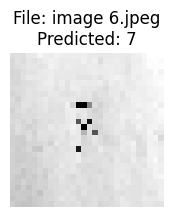

The model predicted for image 6.jpeg is: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


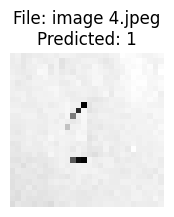

The model predicted for image 4.jpeg is: 1


In [26]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# dataset path
folder_path = '/kaggle/input/test-datase' 

# name of files of that folders
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# loop for processing evry image
for image_name in image_files:
    full_path = os.path.join(folder_path, image_name)
    
    # ১. image load
    img = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    
    if img is not None:
        # resize
        img_resized = cv2.resize(img, (28, 28))

        # ৩. color invert
        img_final = cv2.bitwise_not(img_resized)

        # ৪.normalization and reshaping
        img_final = img_final / 255.0
        img_final = img_final.reshape(1, 28, 28, 1)

        # ৫. prediction
        prediction = model.predict(img_final)
        result = np.argmax(prediction)

        # রshow result
        plt.figure(figsize=(2,2))
        plt.imshow(img_resized, cmap='gray')
        plt.title(f"File: {image_name}\nPredicted: {result}")
        plt.axis('off')
        plt.show()

        print(f"The model predicted for {image_name} is: {result}")
    else:
        print(f"Error loading image: {image_name}")